###📊 Score Analysis for Compound Risk Scoring

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load scored data
df = pd.read_csv("../data/output/wallet_scores.csv")

In [3]:
df.head()

,wallet,score
0,0x0039f22efb07a647557c7c5d17854cfd6d489ef3,504
1,0x06b51c6882b27cb05e712185531c1f74996dd988,495
2,0x0795732aacc448030ef374374eaae57d2965c16c,495
3,0x0aaa79f1a86bc8136cd0d1ca0d51964f4e3766f9,495
4,0x0fe383e5abc200055a7f391f94a5f5d1f844b9ae,495


In [4]:
# ✅ Summary statistics
print("=== Score Distribution Summary ===")
display(df["score"].describe())

=== Score Distribution Summary ===


count     81.000000
mean     500.012346
std       21.187552
min      453.000000
25%      495.000000
50%      495.000000
75%      495.000000
max      586.000000
Name: score, dtype: float64

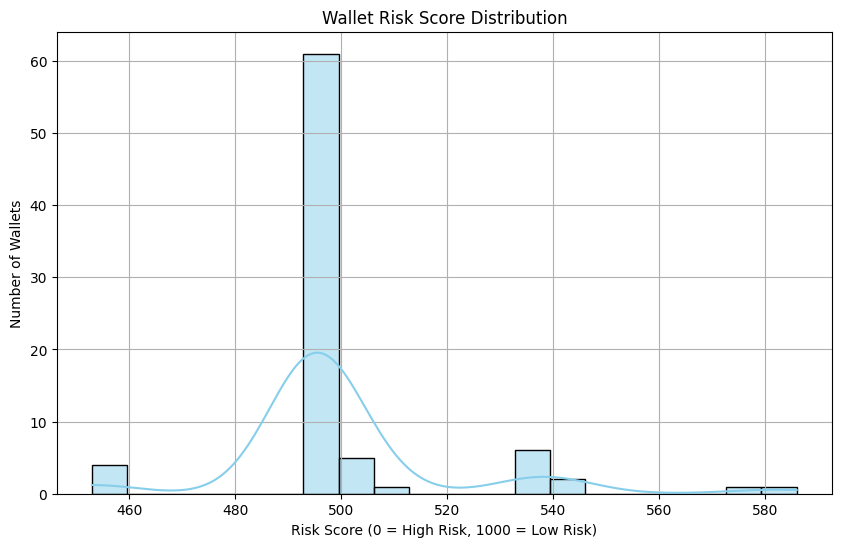

In [5]:
# ✅ Histogram of risk scores
plt.figure(figsize=(10, 6))
sns.histplot(df["score"], bins=20, kde=True, color="skyblue")
plt.title("Wallet Risk Score Distribution")
plt.xlabel("Risk Score (0 = High Risk, 1000 = Low Risk)")
plt.ylabel("Number of Wallets")
plt.grid(True)
plt.show()

In [6]:
# ✅ Identify top 10 riskiest wallets
top_risk = df.sort_values(by="score").head(10)
print("=== Top 10 Riskiest Wallets ===")
display(top_risk)

=== Top 10 Riskiest Wallets ===


,wallet,score
60,0xb271ff7090b39028eb6e711c3f89a3453d5861ee,453
56,0x96479b087cb8f236a5e2dcbfc50ce63b2f421da6,453
74,0xded1f838ae6aa5fcd0f13481b37ee88e5bdccb3d,453
64,0xc179d55f7e00e789915760f7d260a1bf6285278b,453
24,0x4839e666e2baf12a51bf004392b35972eeddeabf,494
5,0x104ae61d8d487ad689969a17807ddc338b445416,495
6,0x111c7208a7e2af345d36b6d4aace8740d61a3078,495
1,0x06b51c6882b27cb05e712185531c1f74996dd988,495
14,0x27f72a000d8e9f324583f3a3491ea66998275b28,495
9,0x19df3e87f73c4aaf4809295561465b993e102668,495


In [7]:
# ✅ Identify safest wallets
top_safe = df.sort_values(by="score", ascending=False).head(10)
print("=== Top 10 Safest Wallets ===")
display(top_safe)

=== Top 10 Safest Wallets ===


,wallet,score
76,0xf340b9f2098f80b86fbc5ede586c319473aa11f3,586
11,0x1c1b30ca93ef57452d53885d97a74f61daf2bf4f,579
53,0x8be38ea2b22b706aef313c2de81f7d179024dd30,543
35,0x612a3500559be7be7703de6dc397afb541a16f7f,541
38,0x6e355417f7f56e7927d1cd971f0b5a1e6d538487,538
25,0x4d997c89bc659a3e8452038a8101161e7e7e53a7,537
17,0x330513970efd9e8dd606275fb4c50378989b3204,537
44,0x7b57dbe2f2e4912a29754ff3e412ed9507fd8957,537
29,0x507b6c0d950702f066a9a1bd5e85206f87b065ba,537
72,0xdde73df7bd4d704a89ad8421402701b3a460c6e9,537


=== Wallet Count by Risk Category ===


,wallet_count
risk_category,
High Risk,0
Medium Risk,81
Low Risk,0


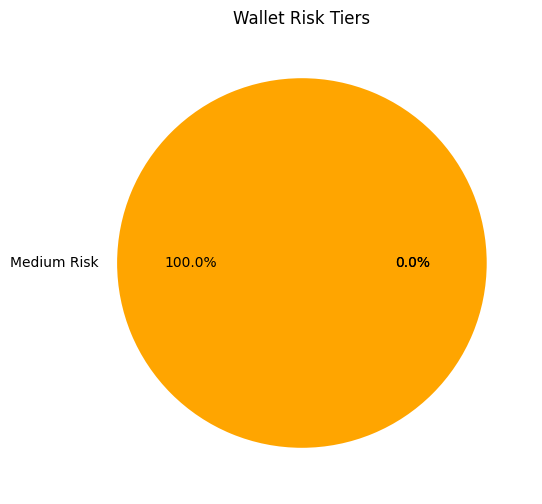

In [8]:
# === Count wallets by risk category ===

def risk_category(score):
    if score <= 300:
        return "High Risk"
    elif 400 <= score <= 700:
        return "Medium Risk"
    elif score >= 800:
        return "Low Risk"
    else:
        return "Uncategorized"

df["risk_category"] = df["score"].apply(risk_category)

# Count by category
risk_counts = df["risk_category"].value_counts().reindex(["High Risk", "Medium Risk", "Low Risk"], fill_value=0)

# Display table
print("=== Wallet Count by Risk Category ===")
display(risk_counts.to_frame("wallet_count"))

# Optional pie chart
plt.figure(figsize=(6, 6))
risk_counts.plot.pie(autopct="%1.1f%%", colors=["red", "orange", "green"], ylabel="")
plt.title("Wallet Risk Tiers")
plt.show()
